# Introduction.

Let's play a game, we are going to pick the students that are late today as volunteers. I want to know who has the best accuracy at trhowing a coin, so we are going to make this students throw the coin see how far is the coin to the cup.

 What have we measured with our experiment?

    a)We measured accuracy and so the first student has supperior skills and will always perform better.
    
    b)We need more experiments, as one or few measurements cannot determine skills. (Regression to the mean).
    
    c)Our meassurements are independent of talent, the output is random.
    
    
    
    
If we repeat the experiment, each player's accuracy would look like:

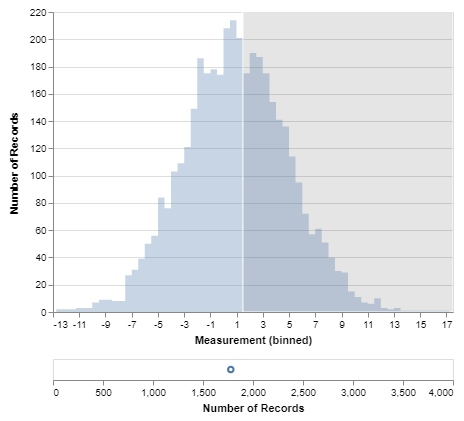

In [2]:
from IPython.display import Image
Image(filename='img/visualization.png') 

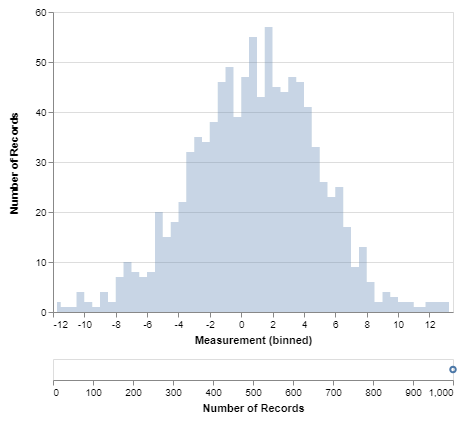

In [17]:
import pandas as pd
import altair as alt
import numpy as np
#np.random.seed(42)
alt.renderers.enable('notebook')
# Generating Data
values = 1000
source = pd.DataFrame({'Trial': np.random.normal(1, 4, values)})

# Tidying Data
source = pd.melt(
    source,
    id_vars=source.index.name,
    value_vars=source.columns,
    var_name='Skills',
    value_name='Measurement'
)
interval = alt.selection_interval(encodings=['x'])

ats = alt.Chart(source).mark_area(
    opacity=0.3,
    interpolate='step',
).encode(
    alt.X('Measurement', bin=alt.Bin(maxbins=100)),
    alt.Y('count()', stack=None),
   ).add_selection(
    interval
)

hist = alt.Chart(source).mark_point().encode(
alt.X('count()', scale=alt.Scale(domain=[0,values]))).transform_filter(interval)

ats & hist

Math people always likes to generalize and work with infinite numbers, even if that is just an approximation to the real world. We substitute that probability distribution by a normal distribution  with equation $n(x;\mu,\sigma)=\frac{1}{(2\pi)^{1/2} \sigma}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$ where $\mu$ = mean, $\sigma$=  standard deviation.

Reminder.
    
    The mean is the middle value in a Bell curve (Gaussian distribution).

    The standard deviation measures the shape of the Bell curve.
    


###### Performance.
How well a player did on a particular game. We expect performance to vary (tiredness, fluctuation of enthusiasm)...

##### Skill.
Average performance.

    Axiom 1: 
    Each player has a skill value, represented by a continuous variable.


###### Regression to the mean is a very tricky topic, in fact, whenever a lawyer needs to explain regression to the mean to the Jury, they know they will end up losing the case.


Examples of players performance:

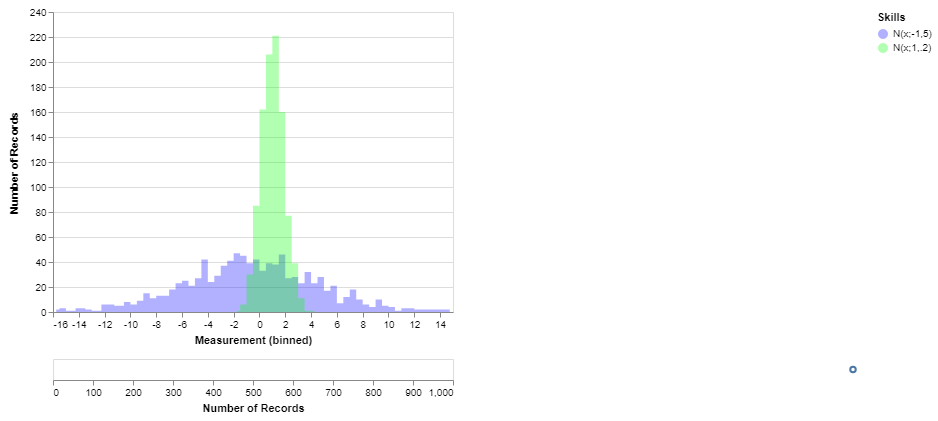

In [10]:
import pandas as pd
import altair as alt
import numpy as np
np.random.seed(42)

# Generating Data
source = pd.DataFrame({'N(x;1,.2)': np.random.normal(1, .9, 1000),
                   'N(x;-1,5)': np.random.normal(-1, 5, 1000)})

# Tidying Data
source = pd.melt(
    source,
    id_vars=source.index.name,
    value_vars=source.columns,
    var_name='Skills',
    value_name='Measurement'
)
interval = alt.selection_interval(encodings=['x'])
ats = alt.Chart(source).mark_area(
    opacity=0.3,
    interpolate='step'
).encode(
    alt.X('Measurement', bin=alt.Bin(maxbins=100)),
    alt.Y('count()', stack=None),
    alt.Color(
        'Skills',
        scale=alt.Scale(range=['#0000ff','#00ff00'])
    )
).add_selection(
    interval
)

hist = alt.Chart(source).mark_point().encode(
alt.X('count()', scale=alt.Scale(domain=[0,1000]))).transform_filter(interval)

ats & hist


    Who has higher skills? 

    who has more experience?

    who do we expect to win more often?

###### Stronger players are expected to win more often than weaker players


In fact if we assume Gauss distribution we have equations:
Probability that player one wins:
$CumGauss(\frac{P1skill-P2skill}{\sqrt{2}perfSD})$


Today we will target the problem of evaluating performance.

## Chess.


In our first approximation we will consider the ELO rating.

If we know the skills, how does our model updates after a game?

###### ELO rating.
    The Elo rating system is a method for calculating the relative skill levels of players in zero-sum games such as chess. It is named after its creator Arpad Elo, a Hungarian-American physics professor

How is the Elo updated?

Let's consider Jill and Fred, we know that the probability of Jill to win is:
$JillAverageScore=CumGauss(\frac{JillSkill-FredSkill}{\sqrt{2}perfSD})$


###### Degree of Surprise:
    the difference between the actual score of a player and the expected score.

If $X=\{0,1,.5\}$ is the points that Jill obtained after a match:

    DegreeOfSurpriseJill = X-JillAverageScore
    JillSkill(X) = JillSkill + k(X-JillAverageScore)

    For instance, FIDE (the World Chess Federation) uses K=30 for new players (this was increased from the previous value of 25 in July 2011 to accelerate the rating changes for early players). Once a player has played 30 games, this switches to K=15 as long as their rating remains below 2,400, and becomes K =10 once players have achieved a rating of 2,400. By tracking uncertainty in a model-based approach, we can avoid the need for such ad-hoc parameter changes.

Who has the highest ELO?

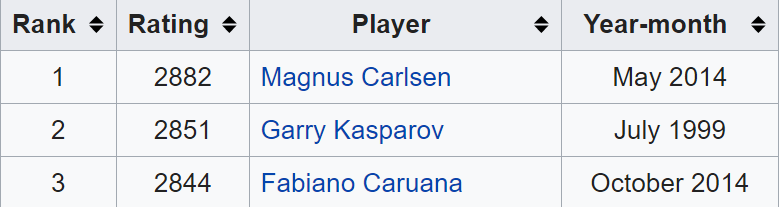

In [14]:
Image('img/helo.png')

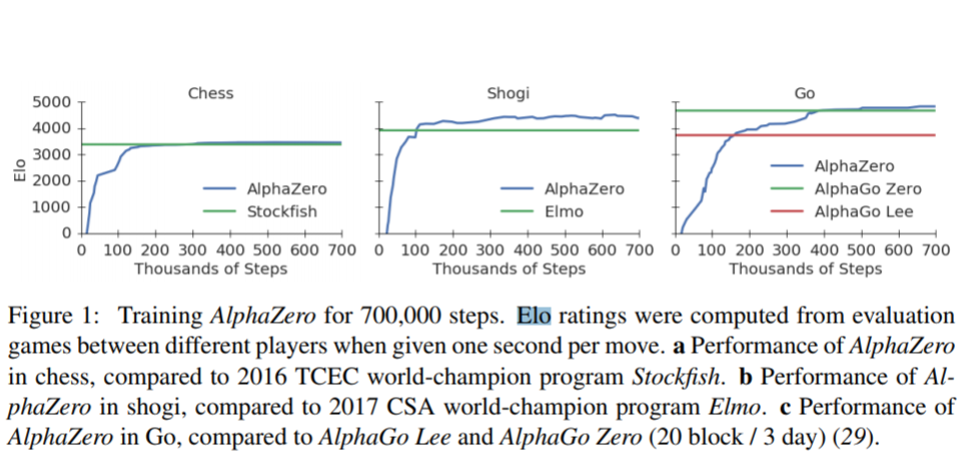

In [13]:
Image('img/elo.png')

The Elo rating is easy to compute, but it is just an algorithm, we dont know the assumptions made, and the value of K depends on cases...



## Xbox

 Jill and Fred now play Xbox. 

 To try to determine the skills of players.
 Warning: Perhaps an skilled player is creating a second account, or the player has experience in similar tasks.
 
 Since we know very little about a player before they play any games, this distribution needs to be broad and cover the full range of skills that a new player might have.
 

    Axiom1*. 
    Each player has a skill value, represented by a continuous variable with a broad prior distribution.

In [ ]:
import pandas as pd
import altair as alt
import numpy as np
np.random.seed(42)

# Generating Data
source = pd.DataFrame({'Jill': np.random.normal(120, 40, 1000),
                   'Fred': np.random.normal(100, 5, 1000)})

# Tidying Data
source = pd.melt(
    source,
    id_vars=source.index.name,
    value_vars=source.columns,
    var_name='Skills',
    value_name='Measurement'
)
interval = alt.selection_interval(encodings=['x'])
alt.Chart(source).mark_area(
    opacity=0.3,
    interpolate='step'
).encode(
    alt.X('Measurement', bin=alt.Bin(maxbins=100)),
    alt.Y('count()', stack=None),
    alt.Color(
        'Skills',
        scale=alt.Scale(range=['#0000ff', '#008000', '#ff0000'])
    )
).add_selection(
    interval
)

Jill is a relatively new player and so there is a lot of uncertainty in her skill whereas Fred is a more established player whose skill is more precisely known. 

We consider the probability that Jill wins the match. 


To understand the relationship of our variables lets look at the factor graph:

Factor graph. 
        
    Choosing which variables we want to learn about: Skills
    Prior probability for each variable. (Gaussian)
    
    Variables representing data we actually have.
    Probability for each variable.
    

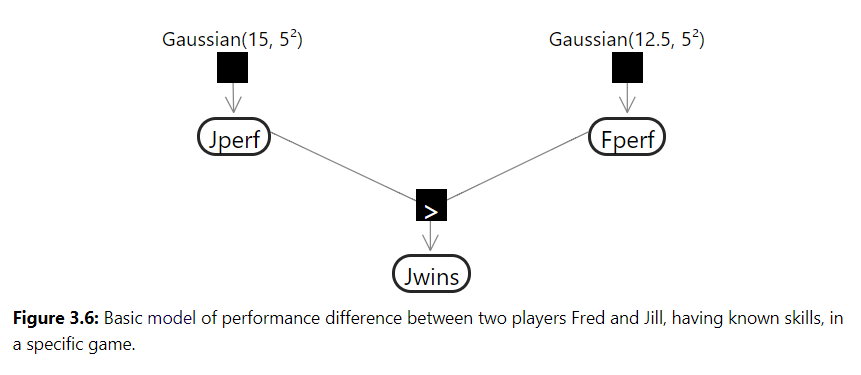

In [90]:
from IPython.display import Image
Image("img/model1.png")


  Once a new player has played a game, we aim to use the outcome of the game to infer the updated skill distribution for the player (and also for any other players in the game). This involves solving a probabilistic inference problem to calculate the posterior distribution of each player’s skill, taking account of the new information provided by the result of the game. 
 

    Axiom 2.
    Each player has a performance value for each game, which varies from game to game such that the average value is equal to the skill of that player. The variation in performance, which is the same for all players, is symmetrically distributed around the mean value and is more likely to be close to the mean than to be far from the mean.

    Axiom 3.
    The player with the highest performance value wins the game.

To consider uncertaintinity we add two more uncertain variables $Jskill$ and $Fskill$:

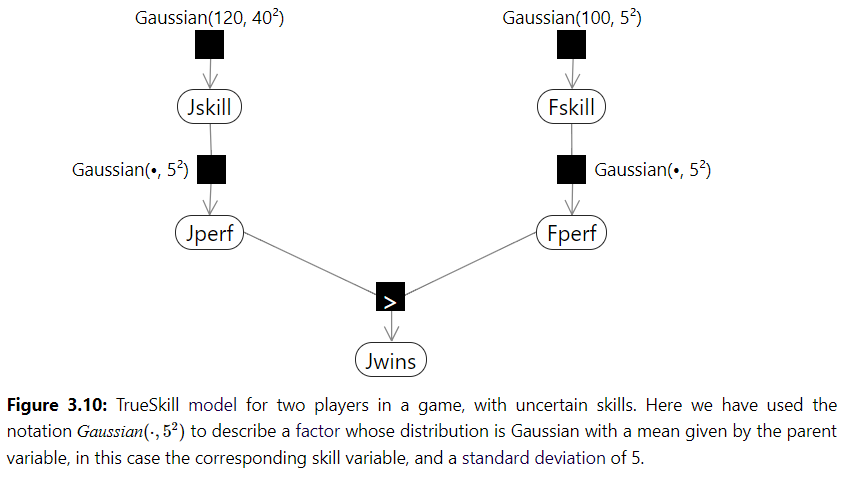

In [93]:
from IPython.display import Image
Image("img/TrueSkill.png")

If you read the book you'll find out that belief propagation is not the best method to use as every time Jill plays we we increase the number of variables on the posterior.

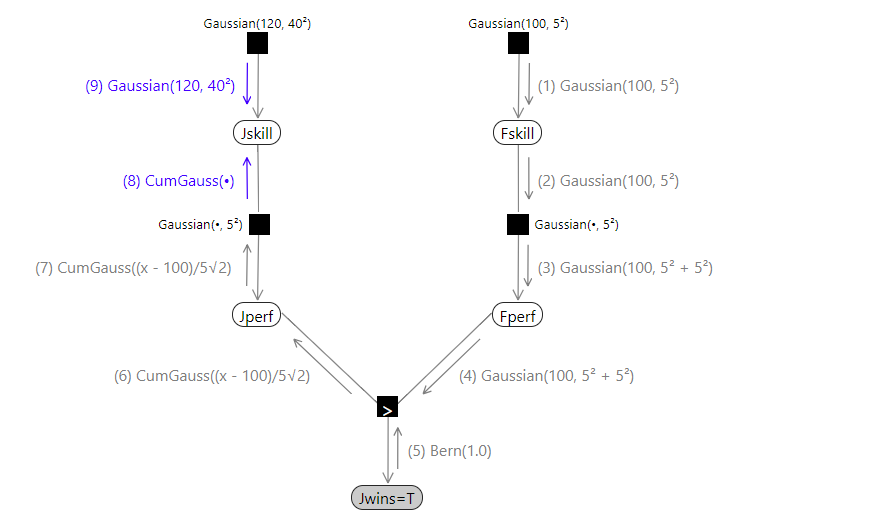

In [94]:
from IPython.display import Image
Image("img/Belief.png")

The book uses instead expectation propagation which is works locally sometimes.

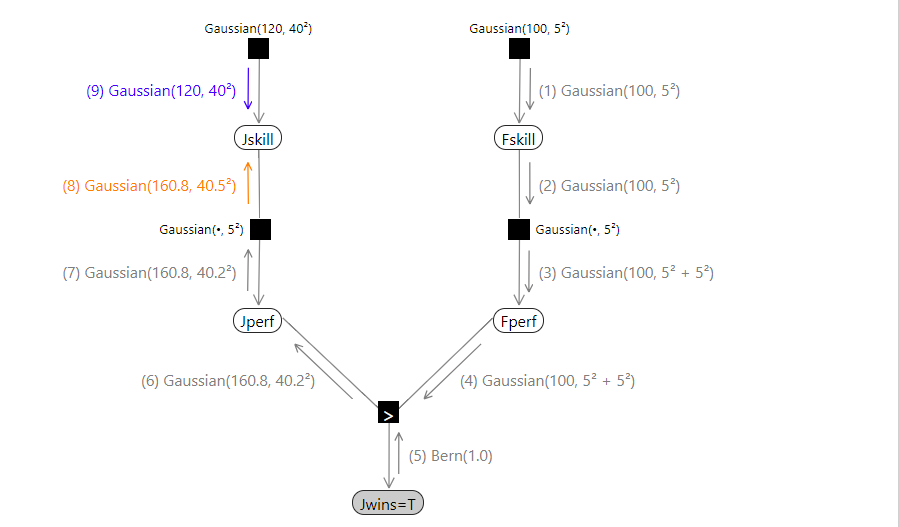

In [95]:
from IPython.display import Image
Image("img/expectation.png")

When we have too many players we can use Online learning: in which each player’s skill distribution gets updated only when a game outcome is obtained which involves that player. We therefore need only store the mean and variance of the Gaussian skill distribution for each player. When a player plays a new game, we run inference using this current Gaussian skill distribution as the prior, and the resulting posterior distribution is then stored and forms the prior for the next gam

Improving model assumptions:
       
    If we have several players, we modify our message-passing schedule so that we first pass messages downwards from the skill nodes to the performance nodes (as before), then we perform multiple passes back and forth amongst the performance nodes until we achieve convergence, and then finally pass messages upwards to the skill nodes in order to evaluate posterior skill marginals.
       
       
       

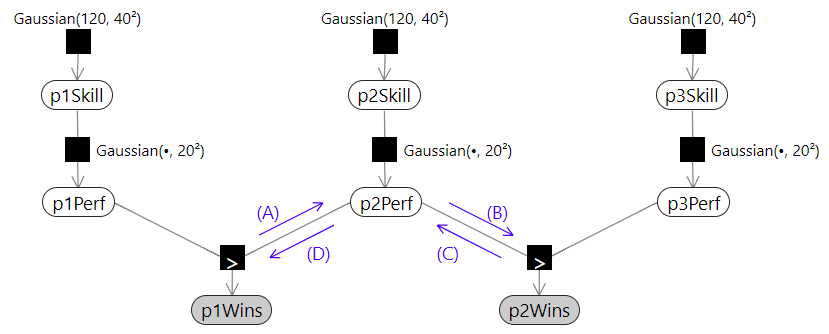

In [5]:
Image('img/morep.png')

Once we are familiar with graphs, we can use them to improve our model, for example if we are now competing as a team, we can change one of our model assumptions to:

    The performance of a team is the sum of the performances of its members, and the team with the highest performance value wins the game.

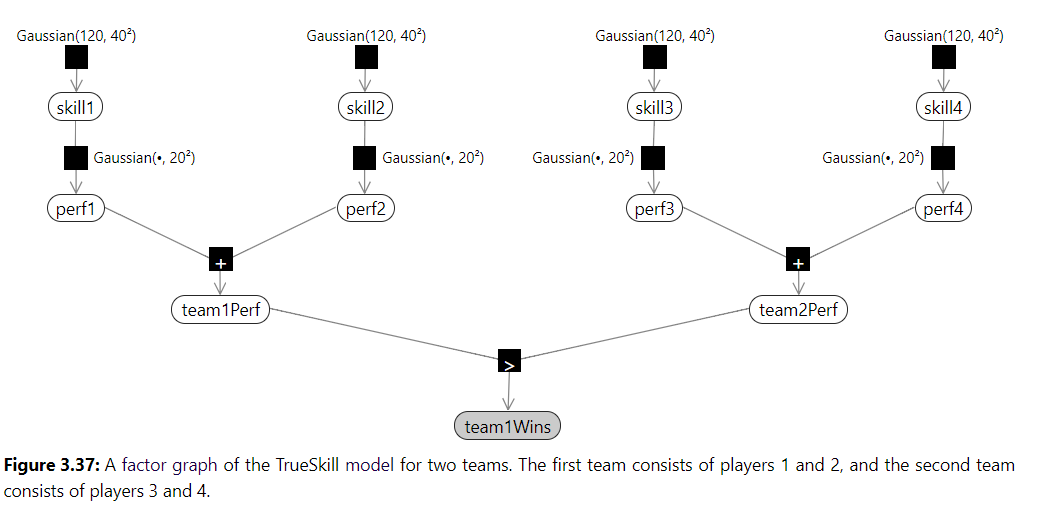

In [6]:
Image('img/teams.png')

Each player has a skill value, represented by a continuous variable, given by their skill value in their previous game plus some change in skill which has a zero-mean bell-shaped distribution.

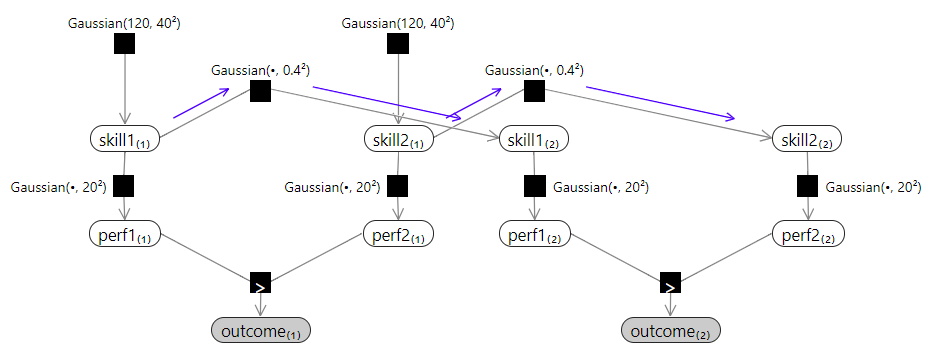

In [7]:
Image('img/time.png')

Let's look at the data that we have:

In [1]:
import pandas
df = pandas.read_csv('Data/TrueSkill_Halo2-HeadToHead_Games[160_to_167].csv')
print(df)

      Player1     Player2  Player1Score  Player2Score  \
0  Gamer00123  Gamer00103             0             2   
1  Gamer00044  Gamer00094             2             4   
2  Gamer00139  Gamer00074             2             5   
3  Gamer00095  Gamer00140             2             2   
4  Gamer00120  Gamer00141             5             1   
5  Gamer00142  Gamer00143             5             2   
6  Gamer00144  Gamer00122             1             1   
7  Gamer00116  Gamer00145             5             0   

                    Players  Scores     Outcome  Draw Proportion      Id  \
0  {Gamer00123, Gamer00103}  {0, 2}  Player2Win                0  282203   
1  {Gamer00044, Gamer00094}  {2, 4}  Player2Win                0  282201   
2  {Gamer00139, Gamer00074}  {2, 5}  Player2Win                0  282205   
3  {Gamer00095, Gamer00140}  {2, 2}        Draw                1  282211   
4  {Gamer00120, Gamer00141}  {5, 1}  Player1Win                0  282209   
5  {Gamer00142, Gamer00143}  {